# **Credit Card Customer churn Analysis - Transform**

## Objectives

* By the end of the extraction phase, I will:
    1. Transform data to extract insights
    2. Answer questions from the "Extract" phase
    3. Validate the answers with statistical tests

## Inputs

* bank_churners_extracted.csv
**Hypotheses to test:**
    1. Attrited customers have significantly lower total transaction amounts than existing customers
    2. Customer attrition is higher among clients with lower credit limits.
    3. Attrition rates vary by marital status, with single customers having higher churn.
    4. Customers with lower education levels tend to churn more often than those with higher education levels.
    5. Customers with lower income ranges are likely to churn more often than those who earn more.

## Outputs

* Transformed data
* Validated hypotheses
* Plausible solutions to business the problem - what factors predict attrition.



---

importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy
import scipy.stats as stats
import plotly.express as px
from scipy.stats import mannwhitneyu

installing plotly, nbformat, and rerunning requirements.txt

In [3]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Transformation

I will re-run a correlation text, but this time, I will convert the categorical variables into numerical variables so I can review how key variables such as income, marital status, education and the liked interact with attrition.

In [5]:
df = pd.read_csv("../data/bank_churners_extracted.csv") #Loading the new dataset
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [54]:
(df== 0).sum() #Checking for null values

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count              904
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon        29
Contacts_Count_12_mon        399
Credit_Limit                   0
Total_Revolving_Bal         2470
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           5
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            7
Avg_Utilization_Ratio       2470
mod_Attrition_Flag          8500
mod_Gender                  5358
mod_Education_Level         1487
mod_Income_Category            0
mod_Card_Category           9436
handled_Total_Trans_Amt        0
mod_Age_Group                  0
Trans_per_Month                0
Avg_Trans_Amt                  0
Util_Ratio

**ASSUMPTION**: Total_Revolving_Balance (carried-forward balance) has 2470 0s. This means 2470 customers pay off their credit card bill in full. I am assuming that this is valid as it impacts calculations further down.

In [6]:
categorical_columns = df.select_dtypes(include="object")
for col in categorical_columns:
   print(f"{col}: {df[col].unique()}")

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


**Lessons learnt.**
1. Using 0 as an ordinal or nominal number could distort values and lower the mean. Using null is an option, however, it might get counted in plots. So, it's better to keep these as np.nan... that way, it's safe for interpretations.

In [7]:
df["mod_Attrition_Flag"] = df["Attrition_Flag"].apply(lambda x: 1 if x =="Attrited Customer" else 0 )
df["mod_Gender"] = df["Gender"].apply(lambda x: 1 if x == "M" else 0)
df["mod_Education_Level"] = df["Education_Level"].replace({"Unknown": np.nan, "Uneducated": 0,  "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5}).infer_objects(copy=False)
df["Marital_Status"] = df["Marital_Status"].replace({"Unknown": np.nan, "Single": 1, "Married": 2, "Divorced": 3}).infer_objects(copy=False)
df["mod_Income_Category"] = df["Income_Category"].replace({"Unknown": np.nan, "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5}).infer_objects(copy=False)
df["mod_Card_Category"] = df["Card_Category"].replace({"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3}).infer_objects(copy=False)
df

C:\Users\mshin\AppData\Local\Temp\ipykernel_24840\3437206724.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["mod_Education_Level"] = df["Education_Level"].replace({"Unknown": np.nan, "Uneducated": 0,  "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5}).infer_objects(copy=False)
C:\Users\mshin\AppData\Local\Temp\ipykernel_24840\3437206724.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Marital_Status"] = df["Marital_Status"].replace({"Unknown": np.nan, "Single": 1, "Married": 2, "Divo

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mod_Attrition_Flag,mod_Gender,mod_Education_Level,mod_Income_Category,mod_Card_Category
0,768805383,Existing Customer,45,M,3,High School,2.0,$60K - $80K,Blue,39,...,1.335,1144,42,1.625,0.061,0,1,1.0,3.0,0
1,818770008,Existing Customer,49,F,5,Graduate,1.0,Less than $40K,Blue,44,...,1.541,1291,33,3.714,0.105,0,0,3.0,1.0,0
2,713982108,Existing Customer,51,M,3,Graduate,2.0,$80K - $120K,Blue,36,...,2.594,1887,20,2.333,0.000,0,1,3.0,4.0,0
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,1.405,1171,20,2.333,0.760,0,0,1.0,1.0,0
4,709106358,Existing Customer,40,M,3,Uneducated,2.0,$60K - $80K,Blue,21,...,2.175,816,28,2.500,0.000,0,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,1.0,$40K - $60K,Blue,40,...,0.703,15476,117,0.857,0.462,0,1,3.0,2.0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,3.0,$40K - $60K,Blue,25,...,0.804,8764,69,0.683,0.511,1,1,NaN,2.0,0
10124,716506083,Attrited Customer,44,F,1,High School,2.0,Less than $40K,Blue,36,...,0.819,10291,60,0.818,0.000,1,0,1.0,1.0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,0.535,8395,62,0.722,0.000,1,1,3.0,2.0,0


## Categorical Variable Encoding Legend ##

The following table shows how categorical variables were transformed into numerical values for analysis:

**Variable Encoding Reference:**

| **Variable** | **Original Category** | **Encoded Value** | **Description** |
|--------------|----------------------|-------------------|-----------------|
| **mod_Attrition_Flag** | Existing Customer | 0 | Customer retained |
| | Attrited Customer | 1 | Customer churned |
| **mod_Gender** | F (Female) | 0 | Female customer |
| | M (Male) | 1 | Male customer |
| **mod_Education_Level** | Unknown | NaN | Education level unknown |
| | Uneducated | 1 | No formal education |
| | High School | 2 | High school graduate |
| | College | 3 | College graduate |
| | Graduate | 4 | Graduate degree |
| | Post-Graduate | 5 | Post-graduate degree |
| | Doctorate | 6 | Doctorate degree |
| **Marital_Status** | Unknown | NaN | Marital status unknown |
| | Single | 1 | Single |
| | Married | 2 | Married |
| | Divorced | 3 | Divorced |
| **mod_Income_Category** | Unknown | NaN | Income unknown |
| | Less than $40K | 1 | Low income |
| | $40K - $60K | 2 | Lower-middle income |
| | $60K - $80K | 3 | Middle income |
| | $80K - $120K | 4 | Upper-middle income |
| | $120K + | 5 | High income |
| **mod_Card_Category** | Blue | 0 | Basic card tier |
| | Silver | 1 | Silver card tier |
| | Gold | 2 | Gold card tier |
| | Platinum | 3 | Premium card tier |

### **Encoding Rationale:**

- **Binary variables** (Attrition, Gender): 0/1 encoding for clear interpretation
- **Ordinal variables** (Education, Income, Card): Numerical scale reflecting natural progression/hierarchy
- **Marital Status**: Arbitrary numerical assignment (no inherent order)
- **Missing/Unknown values**: Assigned NaN for 0s

### **Usage Notes:**

**For correlation analysis**: All variables can now be included in numerical correlation matrices  
**For statistical tests**: Enables parametric and non-parametric testing  
**For machine learning**: Ready for algorithms requiring numerical inputs  
**For visualization**: Allows for comprehensive plotting and analysis

## Log transformation trial

In [8]:
fig = px.histogram(
    df,
    x="Total_Trans_Amt",
    nbins=40,  # adjust for bin granularity
    title="Distribution of Total Transaction Amount",
    labels={"Total_Trans_Amt": "Total Transaction Amount"},
    opacity=0.7,
    color_discrete_sequence=["indigo"]
)

fig.update_layout(
    bargap=0.1,
    template="simple_white",
    width=800,
    height=500
)

fig.show()

In [9]:
df["handled_Total_Trans_Amt"] = np.log1p(df["Total_Trans_Amt"])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mod_Attrition_Flag,mod_Gender,mod_Education_Level,mod_Income_Category,mod_Card_Category,handled_Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,2.0,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,0,1,1.0,3.0,0,7.043160
1,818770008,Existing Customer,49,F,5,Graduate,1.0,Less than $40K,Blue,44,...,1291,33,3.714,0.105,0,0,3.0,1.0,0,7.163947
2,713982108,Existing Customer,51,M,3,Graduate,2.0,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,0,1,3.0,4.0,0,7.543273
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,1171,20,2.333,0.760,0,0,1.0,1.0,0,7.066467
4,709106358,Existing Customer,40,M,3,Uneducated,2.0,$60K - $80K,Blue,21,...,816,28,2.500,0.000,0,1,0.0,3.0,0,6.705639


In [10]:
# Calculate correlation between log-transformed transaction amount and attrition
correlation = df[["handled_Total_Trans_Amt", "mod_Attrition_Flag"]].corr()

# Extract the correlation value
corr_value = correlation.loc["handled_Total_Trans_Amt", "mod_Attrition_Flag"]

# Print result
print(f"Correlation between log-transformed Total_Trans_Amt and Attrition: {corr_value:.4f}")

Correlation between log-transformed Total_Trans_Amt and Attrition: -0.2270


Inspired by ChatGPT, I ran a log transformation expecting to see a jump in the correlation value. A correlation of -0.2 indicates a weak negative correlation between total transaction amoutn and attrition.

## Correlation matrix

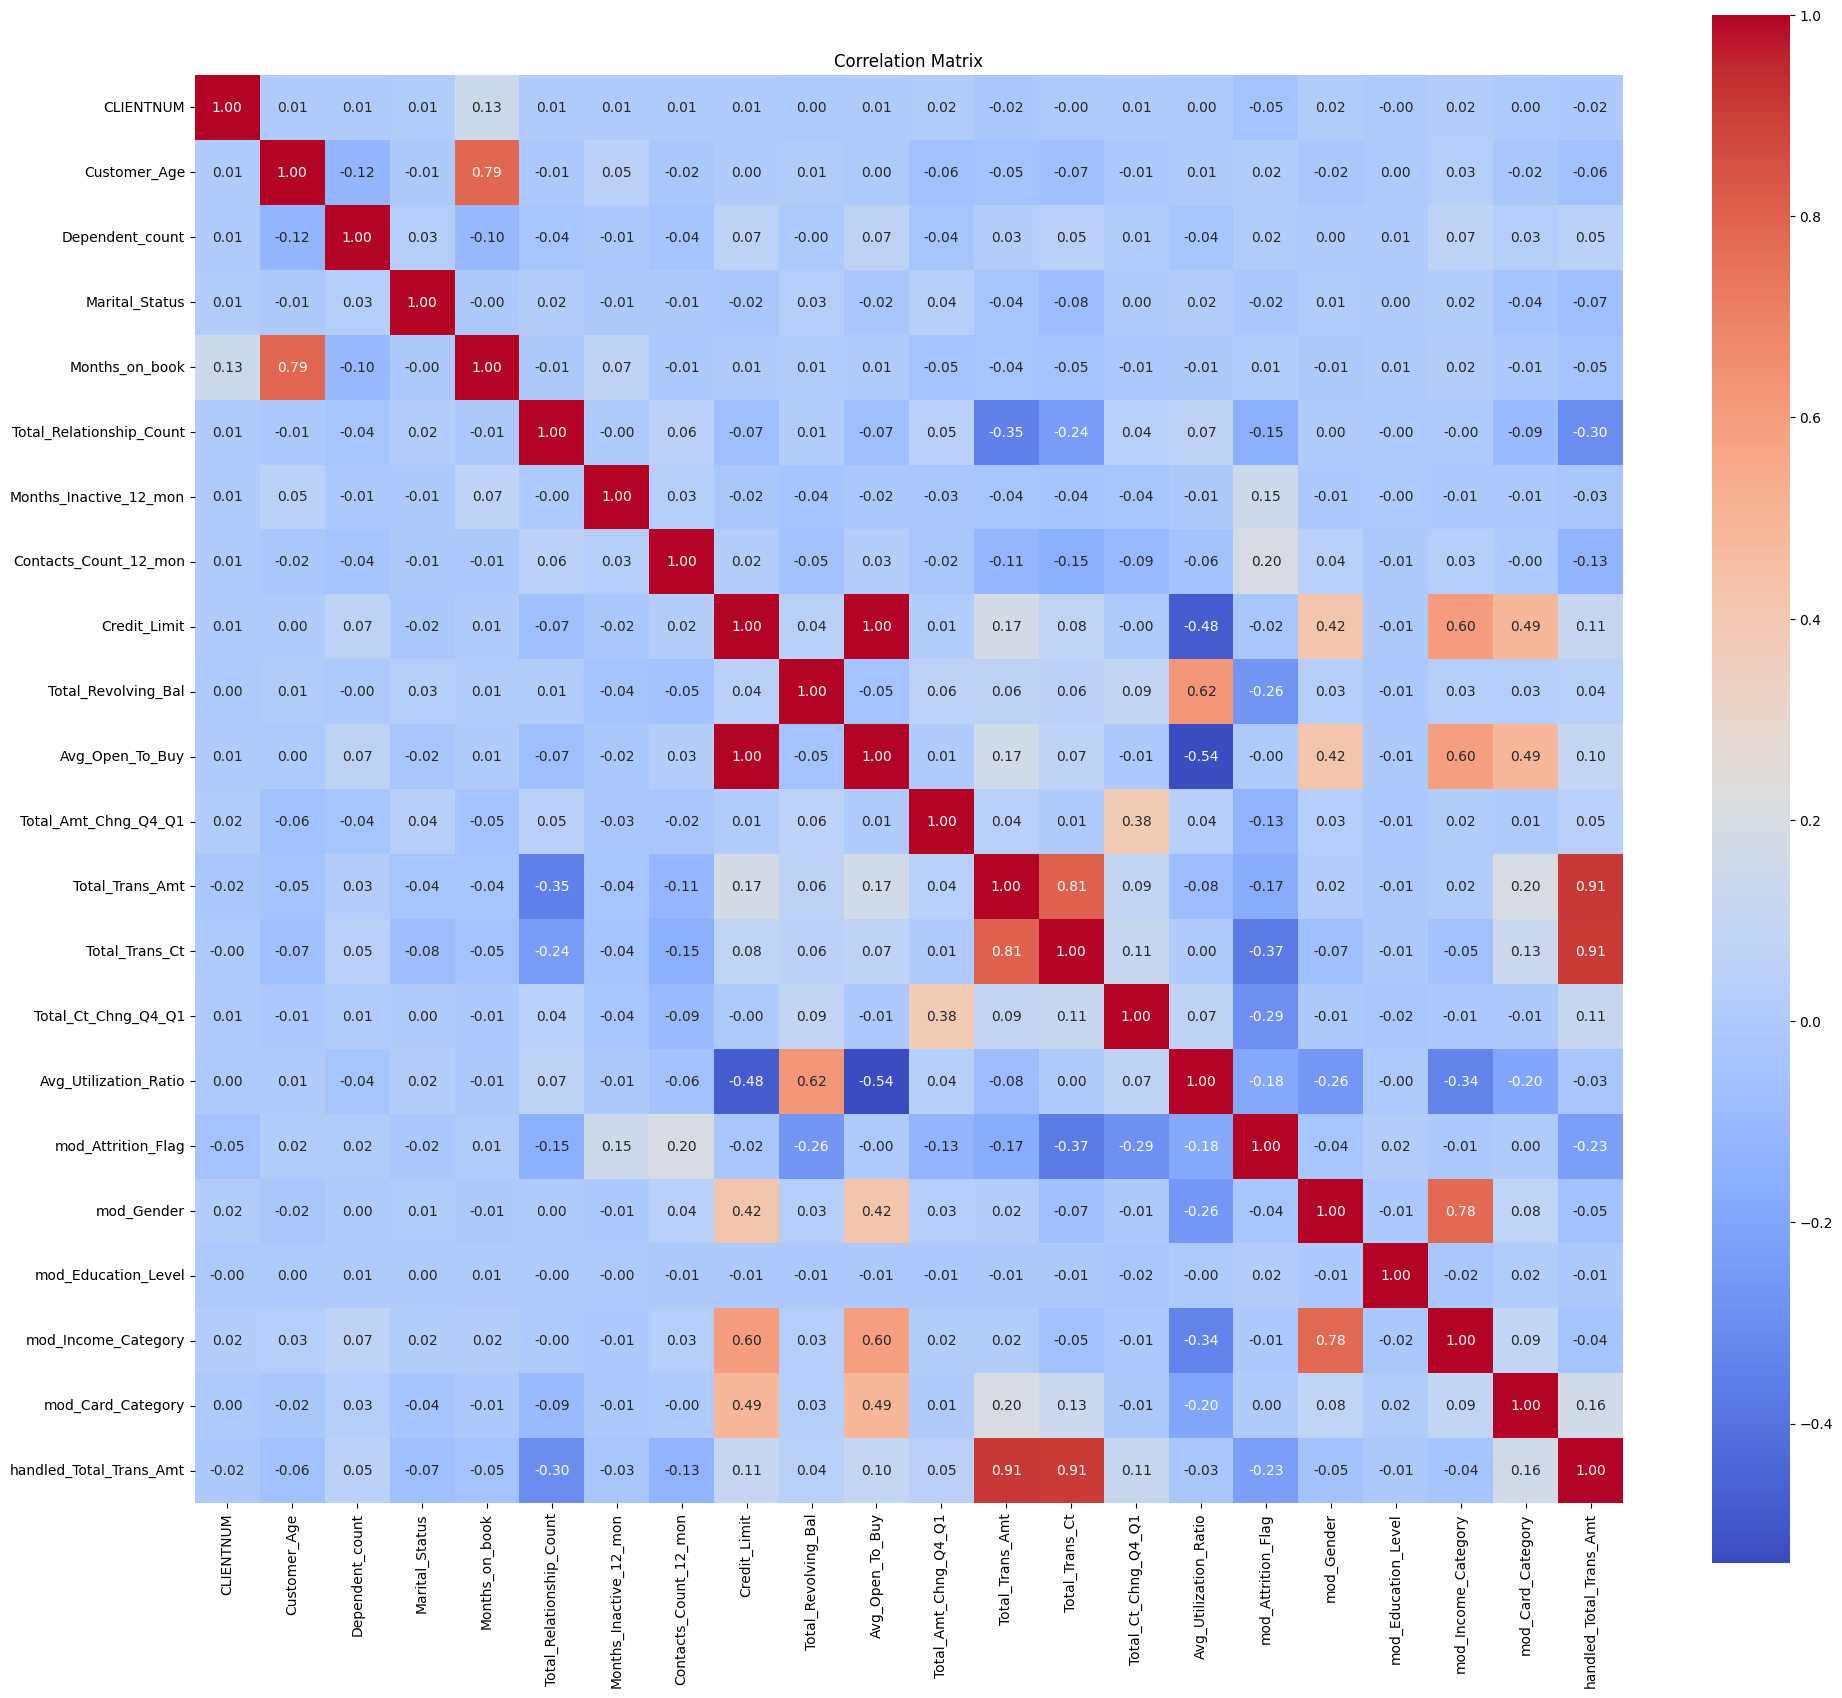

Top 10 highest correlations:
Avg_Open_To_Buy          Credit_Limit               0.995981
Credit_Limit             Avg_Open_To_Buy            0.995981
handled_Total_Trans_Amt  Total_Trans_Amt            0.911507
Total_Trans_Amt          handled_Total_Trans_Amt    0.911507
Total_Trans_Ct           handled_Total_Trans_Amt    0.906957
handled_Total_Trans_Amt  Total_Trans_Ct             0.906957
Total_Trans_Amt          Total_Trans_Ct             0.807192
Total_Trans_Ct           Total_Trans_Amt            0.807192
Months_on_book           Customer_Age               0.788912
Customer_Age             Months_on_book             0.788912
dtype: float64

NEGATIVE CORRELATIONS:
Negative correlations (most negative first):
Avg_Open_To_Buy        Avg_Utilization_Ratio   -0.538808
Avg_Utilization_Ratio  Avg_Open_To_Buy         -0.538808
                       Credit_Limit            -0.482965
Credit_Limit           Avg_Utilization_Ratio   -0.482965
Total_Trans_Ct         mod_Attrition_Flag      -0

In [11]:
numerical_columns = df.select_dtypes(include="number").columns
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, 
            cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Exclude self-correlations

print("Top 10 highest correlations:")
print(corr_pairs.head(10))

print("\n" + "="*50)
print("NEGATIVE CORRELATIONS:")
print("="*50)

# Get negative correlations sorted from most negative to least negative
negative_corr = corr_pairs[corr_pairs < 0].sort_values(ascending=True)
print("Negative correlations (most negative first):")
print(negative_corr)




**This exercise allows me to pick each category and run statistical tests**

**Correlation Matrix Analysis - Key Findings**

This correlation matrix includes **all numerical variables** plus the **newly encoded categorical variables** (Gender, Education, Marital Status, Income, Card Category). This gives us a comprehensive view of how all factors relate to customer churn.

While attrition doesn't seem to have a positive correlation with any of the variables, we can now run correlation tests and validate key hypotheses.


---

# Dataset grouping

In [12]:
df["Customer_Age"].unique() #Checking customer age distribution to further group the data

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27])

Customers' age ranges between 26 and 73

In [13]:
# Age group encoding: young adults (26-30), adults (31-60), seniors (>60)
age_bins = [25, 30, 60, np.inf]
age_labels = ['Young Adults', 'Adults', 'Seniors']

df["mod_Age_Group"] = pd.cut(df["Customer_Age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# Optional: show value counts for each group
print(df["mod_Age_Group"].value_counts())

mod_Age_Group
Adults          9457
Seniors          405
Young Adults     265
Name: count, dtype: int64


In [14]:
age_attrition = (df.groupby("mod_Age_Group")["mod_Attrition_Flag"]
                 .mean().reset_index())
age_attrition.columns = ["Age Group", "Attrition Rate"]


# Create bar chart with Plotly
fig = px.bar(
    age_attrition,
    x="Age Group",
    y="Attrition Rate",
    title="Attrition Rate by Age Group",
    labels={"Attrition Rate": "Attrition Rate", "Age Group": "Age Group"},
    range_y=[0, 1],  # Since attrition is a rate between 0 and 1
)

# Customize layout for grid lines and spacing
fig.update_layout(
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=1, zeroline=False),
    xaxis=dict(title="Age Group"),
    yaxis_title="Attrition Rate",
    bargap=0.2,
)

fig.show()

C:\Users\mshin\AppData\Local\Temp\ipykernel_24840\605597439.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Attrition Rate by Age Group:**
The bar graph shows that young adults are the least likely to attrition wheras as adults are more likely to attrition. However, the difference is quite subtle.

**Business Impact:**
Adults (aged between 31-60) are more prone to attrition than other age groups. Closely following are Seniors(aged <60), and they 

In [15]:
# Grouped by Marital Status
marital_grouped = (
    df.groupby("Marital_Status")["mod_Attrition_Flag"]
    .agg(['count', 'sum', 'mean']).reset_index()
    )
marital_grouped.columns = ["Marital Status", "Total Customers", 
                           "Attrited Customers", "Attrition Rate"]

# Grouped by Education Level
education_grouped = (
    df.groupby("mod_Education_Level")["mod_Attrition_Flag"]
    .agg(['count', 'sum', 'mean']).reset_index()
    )
education_grouped.columns = ["Education Level", "Total Customers", 
                             "Attrited Customers", "Attrition Rate"]

# Grouped by Income Category
income_grouped = (
    df.groupby("mod_Income_Category")["mod_Attrition_Flag"]
    .agg(['count', 'sum', 'mean']).reset_index()
    )
income_grouped.columns = ["Income Category", "Total Customers", 
                          "Attrited Customers", "Attrition Rate"]

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mod_Attrition_Flag,mod_Gender,mod_Education_Level,mod_Income_Category,mod_Card_Category,handled_Total_Trans_Amt,mod_Age_Group
0,768805383,Existing Customer,45,M,3,High School,2.0,$60K - $80K,Blue,39,...,42,1.625,0.061,0,1,1.0,3.0,0,7.043160,Adults
1,818770008,Existing Customer,49,F,5,Graduate,1.0,Less than $40K,Blue,44,...,33,3.714,0.105,0,0,3.0,1.0,0,7.163947,Adults
2,713982108,Existing Customer,51,M,3,Graduate,2.0,$80K - $120K,Blue,36,...,20,2.333,0.000,0,1,3.0,4.0,0,7.543273,Adults
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,20,2.333,0.760,0,0,1.0,1.0,0,7.066467,Adults
4,709106358,Existing Customer,40,M,3,Uneducated,2.0,$60K - $80K,Blue,21,...,28,2.500,0.000,0,1,0.0,3.0,0,6.705639,Adults


In [16]:
df.to_csv("../data/bank_churners_transformed.csv", index=False)

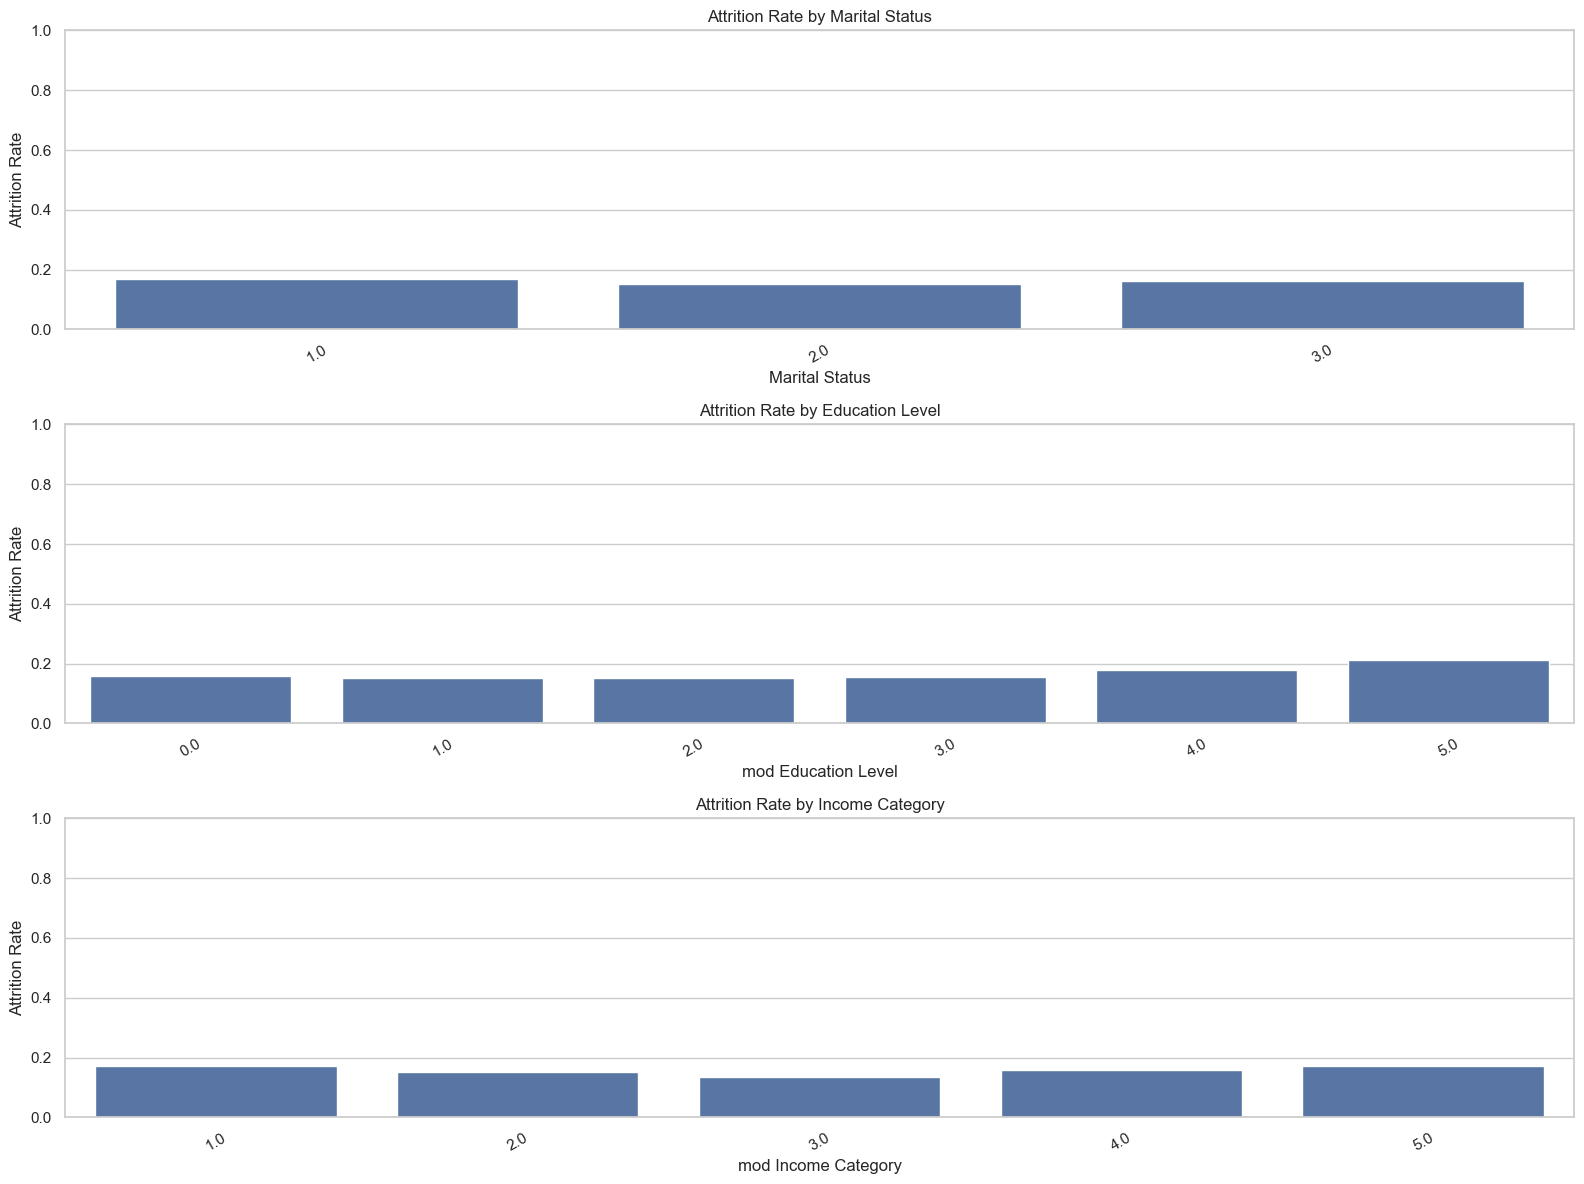

In [17]:
# Set common style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Define plots
categorical_vars = [
    ("Marital_Status", "Attrition Rate by Marital Status"),
    ("mod_Education_Level", "Attrition Rate by Education Level"),
    ("mod_Income_Category", "Attrition Rate by Income Category")
]

# Create a 3-row subplot layout
for i, (col, title) in enumerate(categorical_vars, 1):
    plt.subplot(3, 1, i)
    
    attrition_data = df.groupby(col)["mod_Attrition_Flag"].mean().reset_index()
    attrition_data.columns = [col, "Attrition Rate"]
    
    sns.barplot(x=col, y="Attrition Rate", data=attrition_data, order=attrition_data[col])
    
    plt.title(title)
    plt.ylabel("Attrition Rate")
    plt.xlabel(col.replace("_", " "))
    plt.ylim(0, 1)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [18]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mod_Attrition_Flag,mod_Gender,mod_Education_Level,mod_Income_Category,mod_Card_Category,handled_Total_Trans_Amt,mod_Age_Group
0,768805383,Existing Customer,45,M,3,High School,2.0,$60K - $80K,Blue,39,...,42,1.625,0.061,0,1,1.0,3.0,0,7.043160,Adults
1,818770008,Existing Customer,49,F,5,Graduate,1.0,Less than $40K,Blue,44,...,33,3.714,0.105,0,0,3.0,1.0,0,7.163947,Adults
2,713982108,Existing Customer,51,M,3,Graduate,2.0,$80K - $120K,Blue,36,...,20,2.333,0.000,0,1,3.0,4.0,0,7.543273,Adults
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,20,2.333,0.760,0,0,1.0,1.0,0,7.066467,Adults
4,709106358,Existing Customer,40,M,3,Uneducated,2.0,$60K - $80K,Blue,21,...,28,2.500,0.000,0,1,0.0,3.0,0,6.705639,Adults


# Attrited customers have significantly lower total transaction amounts than existing customers

In [19]:
df["Total_Trans_Amt"].isna().sum()

np.int64(0)

There are no NaN values in this group. Let me run a mwu to determine the correlation.

**Null Hypothesis:** There is no statistical correlation between Total transactions amount and attrition flag. Any such correlation is merely random.

In [20]:
# Grouping the data by attrition flag and calculating the total transaction amount. 
# This will help us understand the spending patterns of attrited vs retained customers
trans_attrited = df[df["mod_Attrition_Flag"] == 1]["Total_Trans_Amt"].dropna()
trans_retained = df[df["mod_Attrition_Flag"] == 0]["Total_Trans_Amt"].dropna()

pg.mwu(x= trans_attrited, y=trans_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,4481880.0,two-sided,2.719009e-112,-0.351838,0.324081


The p-value is extremely tiny and lesser than 0.05. The suggests that there is a strong correaltion between total transaction amount and attrition flag. 

**Business implications:**
Spending patterns can indicate if a customer churn probability.

Let me cross-verify this through visualizations.

In [21]:
box_df = df.dropna(subset=["Total_Trans_Amt", "mod_Attrition_Flag"]).copy()
box_df["Attrition_Label"] = box_df["mod_Attrition_Flag"].map({0: "Retained", 1: "Attrited"})


fig = px.box(
    box_df,
    x="Attrition_Label",
    y="Total_Trans_Amt",
    color="Attrition_Label",
    points="all",
    title="Total Transaction Amount by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Total_Trans_Amt": "Total Transaction Amount"
    },
    width=800,
    height=500
)
fig.show()

**Total Transaction Amount by Attrition Status:**

Attrited customers tend to spend significantly less than retained customers. The mean level in the boxplot is significantly different between existing and atrrited customers.

In [22]:
mean_trans = (
    box_df.groupby("Attrition_Label")["Total_Trans_Amt"]
    .mean()
    .reset_index()
)

fig = px.bar(
    mean_trans,
    x="Attrition_Label",
    y="Total_Trans_Amt",
    color="Attrition_Label",
    title="Mean Total Transaction Amount by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Total_Trans_Amt": "Mean Total Transaction Amount"
    },
    width=600,
    height=400
)
fig.show()

**Mean Total Transaction Amount by Attrition Status:**

The bargraph supplements the statistical test and the boxplot. Attrited customers spend significantly lesser than retained customers.

**Business implication:**

Evidence suggests that customer who spend less are more likely to be at a higher risk of attrition than those who spend less. Engaging with customer who spend less and incentivizing card usage could help improve customer experience and thereby reduce attrition risk.

---

# Customer attrition is higher among clients with lower credit limits.

**Null Hypothesis:** There is no statistical association between credit limit and attrition flag.

In [23]:
# Grouping the data by attrition flag and calculating the credit limit
# This will help us understand the credit limit patterns of attrited vs retained customers

cred_attirited = df[df["mod_Attrition_Flag"] == 1]["Credit_Limit"].dropna()
cred_retained = df[df["mod_Attrition_Flag"] == 0]["Credit_Limit"].dropna()

# Mann-Whitney U Test
pg.mwu(x=cred_attirited, y=cred_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,6361348.0,two-sided,3.007841e-07,-0.080032,0.459984


The p-value, which is extremely tiny, is considerably lower than the alpha value of 0.05. The provides sufficient evidence to negate the null hypothesis, suggesting a strong correlation between credit limit and attrition flag. 

**Business implication:**

Customers who have a lower credit limit are more prone to churning than the ones with higher credit limit. Consistent engagement through marketing efforts, such as campaigns and competitions or incentives, and value added services can help the bank move the customers progressively to higher credit limits/card upgrades.

In [24]:
# Combine the two groups into one DataFrame for plotting
credit_plot_df = pd.concat([
    pd.DataFrame({"Credit_Limit": cred_attirited, "Attrition_Label": "Attrited"}),
    pd.DataFrame({"Credit_Limit": cred_retained, "Attrition_Label": "Retained"})
])

# Create the boxplot
fig = px.box(
    credit_plot_df,
    x="Attrition_Label",
    y="Credit_Limit",
    color="Attrition_Label",
    points="all",
    title="Credit Limit by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Credit_Limit": "Credit Limit"
    },
    width=800,
    height=500
)

fig.update_traces(marker=dict(opacity=0.4, size=5), jitter=0.3)
fig.update_layout(showlegend=False)
fig.show()

**Credit Limit by Attrition Status:**

The box plot shows the mean of retained customer slightly higher than the mean of attrited customers. Although it is not a significantly higher value, it throws open a key focus area for the business.

In [25]:
# Create grouped mean values for bar chart
credit_bar_df = pd.DataFrame({
    "Attrition_Label": ["Attrited", "Retained"],
    "Mean_Credit_Limit": [cred_attirited.mean(), cred_retained.mean()]
})

# Create the bar chart
fig = px.bar(
    credit_bar_df,
    x="Attrition_Label",
    y="Mean_Credit_Limit",
    color="Attrition_Label",
    title="Mean Credit Limit by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Mean_Credit_Limit": "Mean Credit Limit"
    },
    width=600,
    height=400
)

fig.update_layout(showlegend=False)
fig.show()

**Mean Credit Limit by Attrition Status:**

The bargraph shows that the mean credit limit of attrited customers are lower than that of the retained customers complementing the boxplot and MWU observations.

---

# Attrition rates vary by marital status, with single customers having higher churn.

**Null Hypothesis:** Single customers and attrition rates are not statistically linked.

In [26]:
# Grouping the data by marital status and calculating attrition rates

mar_attrited = df[df["mod_Attrition_Flag"] == 1]["Marital_Status"].dropna()
mar_retained = df[df["mod_Attrition_Flag"] == 0]["Marital_Status"].dropna()

# Mann-Whitney U Test (Marital_Status is encoded as 1=Single, 2=Married, 3=Divorced)
pg.mwu(x=mar_attrited, y=mar_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,5741572.5,two-sided,0.061711,-0.027202,0.486399


A p-value score of 0.06 suggests the lack of evidence to negate the null hypothesis. There is not enough evidence to link customers who are singles to attrition status. 

In [27]:
# Combine into one DataFrame
marital_plot_df = pd.concat([
    pd.DataFrame({"Marital_Status": mar_attrited, "Attrition_Label": "Attrited"}),
    pd.DataFrame({"Marital_Status": mar_retained, "Attrition_Label": "Retained"})
])

# Create boxplot
fig = px.box(
    marital_plot_df,
    x="Attrition_Label",
    y="Marital_Status",
    color="Attrition_Label",
    points="all",
    title="Marital Status by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Marital_Status": "Marital Status (1=Single, 2=Married, 3=Divorced)"
    },
    width=800,
    height=500
)

fig.update_traces(marker=dict(opacity=0.4, size=5), jitter=0.3)
fig.update_layout(showlegend=False)
fig.show()

**Marital Status by Attrition Status:**

The boxplot indicates no difference in the means of reetained and attritioned customers based on their marital status - complementing the pvalue.

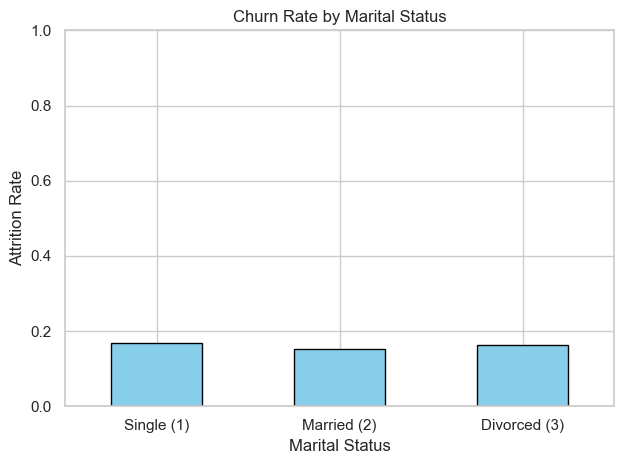

In [28]:
# Calculate mean churn rate by marital status code
marital_churn = df.groupby("Marital_Status")["mod_Attrition_Flag"].mean()

# Create bar plot
marital_churn.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)

# Add labels and title
plt.title("Churn Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Attrition Rate")
plt.xticks(
    ticks=[0, 1, 2],
    labels=["Single (1)", "Married (2)", "Divorced (3)"],
    rotation=0
)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Churn Rate by Marital Status:**

The bar graph displays the attrition rate for each marital status group. It shows that attrition rates are similar across single, married, and divorced customers, indicating marital status is not a strong predictor of churn.

However, married customers' bar graph is slightly lower than singles or divorced. Incentive programs aimed at married customers may show considerable reduction in the attrition rate, which can be tested throuh A/B testing.

---

# Customers with lower education levels tend to churn more often than those with higher education levels.

**Null Hypothesis:** Education level and attrition rates are not statistically linked.

In [29]:
# Split into two groups
edu_attrited = df[df["mod_Attrition_Flag"] == 1]["mod_Education_Level"].dropna()
edu_retained = df[df["mod_Attrition_Flag"] == 0]["mod_Education_Level"].dropna()

# Run Mann–Whitney U Test
pg.mwu(x=edu_attrited, y=edu_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,5098945.5,two-sided,0.090268,0.027814,0.513907


A p-value of 0.09 indicates that we do not have enough evidence to negate the null hypothesis. Education levels may not have a strong correlation to attrition rate. 

In [30]:
# Combine into one DataFrame for boxplot
edu_plot_df = pd.concat([
    pd.DataFrame({"mod_Education_Level": edu_attrited, "Attrition_Label": "Attrited"}),
    pd.DataFrame({"mod_Education_Level": edu_retained, "Attrition_Label": "Retained"})
])

# Create the boxplot
fig = px.box(
    edu_plot_df,
    x="Attrition_Label",
    y="mod_Education_Level",
    color="Attrition_Label",
    points="all",
    title="Education Level by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "mod_Education_Level": "Education Level (Ordinal: 0=Uneducated, ..., 5=Doctorate)"
    },
    width=800,
    height=500
)

fig.update_traces(marker=dict(opacity=0.4, size=5), jitter=0.3)
fig.update_layout(showlegend=False)
fig.show()

**Education Level by Attrition Status**:

This boxplot reveals that there is no difference in the means between attrited and retained groups based on their education level, confirming the pvalue.

In [48]:
# Combine data and count by group
edu_counts = edu_bar_df.groupby(["Education_Label", "Attrition_Label"]).size().reset_index(name="Count")

# Pivot to get counts per education level
edu_pivot = edu_counts.pivot(index="Education_Label", columns="Attrition_Label", values="Count").fillna(0)

# Calculate row-wise total and percentages
edu_pivot["Total"] = edu_pivot.sum(axis=1)
for col in edu_pivot.columns[:-1]:
    edu_pivot[col] = edu_pivot[col] / edu_pivot["Total"]

# Reset index and melt back for plotting
edu_percent_df = edu_pivot.drop(columns="Total").reset_index().melt(id_vars="Education_Label", 
                                                                     var_name="Attrition_Label", 
                                                                     value_name="Percentage")

# Plot
fig = px.bar(
    edu_percent_df,
    x="Percentage",
    y="Education_Label",
    color="Attrition_Label",
    orientation="h",
    barmode="stack",
    title="Customer Churn Rate by Education (Normalized)",
    width=800,
    height=500
)

fig.update_layout(xaxis_tickformat=".0%", xaxis_title="% of Customers", yaxis_title="Education Level")
fig.show()


**Customer Churn Rate by Education (Normalized):**

This bar chart reveals the proportion of churned vs existing customers in each group. You will not be able to compare the different groups as the number of customers within each of these groups is different.

---

# Does income impact attrition rates?

We can use the modified income category to run a statistical test. Let's begin with the null hypothesis:

**Null Hypothesis**: Income categories and attrition rates are not statitstically linked. Any connection between them is merely random.

In [32]:
inc_attrited = df[df["mod_Attrition_Flag"] == 1]["mod_Income_Category"].dropna()
inc_retained = df[df["mod_Attrition_Flag"] == 0]["mod_Income_Category"].dropna()
pg.mwu(x= inc_attrited, y=inc_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,5314320.0,two-sided,0.107954,-0.025611,0.487195


A p-val score of 0.1 does not provide strong evidence to reject the null hypothesis, suggesting no statistically significant association between Income and Attrition Flag.

In [33]:
# Combine into one DataFrame
income_plot_df = pd.concat([
    pd.DataFrame({"mod_Income_Category": inc_attrited, "Attrition_Label": "Attrited"}),
    pd.DataFrame({"mod_Income_Category": inc_retained, "Attrition_Label": "Retained"})
])

# Create the boxplot
fig = px.box(
    income_plot_df,
    x="Attrition_Label",
    y="mod_Income_Category",
    color="Attrition_Label",
    points="all",
    title="Income Category by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "mod_Income_Category": "Income Category (Ordinal: 1 = <$40K, ..., 5 = $120K+)"
    },
    width=800,
    height=500
)

fig.update_traces(marker=dict(opacity=0.4, size=5), jitter=0.3)
fig.update_layout(showlegend=False)
fig.show()

**Income Category by Attrition Status:**

The boxplot visualizes the distribution of income categories for both attrited and retained customers. Complementing the p-value, the plot does not show any significant difference between income categories. You can see the customers from various income groups churn.

What's interesting is that some attrited customers belonged to the income category 4(80-120K).

**Business implication:**

Income is not a strong indicator of attrition rates, however, the fact that some customers who attritioned also have a higher income may warrant relooking engagement strategies and values added services.

In [34]:
bar_df = df.dropna(subset=["mod_Income_Category", "mod_Attrition_Flag"]).copy()

attrition_rate = (
    bar_df.groupby("mod_Income_Category")["mod_Attrition_Flag"]
    .mean()
    .reset_index()
    .rename(columns={"mod_Attrition_Flag": "Attrition Rate"})
)


fig = px.bar(
    attrition_rate,
    x="mod_Income_Category",
    y="Attrition Rate",
    color="mod_Income_Category",
    color_continuous_scale="Blues",
    title="Attrition Rate by Income Category",
    labels={
        "mod_Income_Category": "Income Category (Ordinal)",
        "Attrition Rate": "Attrition Rate"
    },
    width=800,
    height=500
    
)
fig.update_yaxes(range=[0, 1])
fig.show()

**Attrition Rate by Income Category:**

Attrition rates are not dramatically different between income categories.
There is a slight upward trend as income increases, but the difference is small.
Income alone may not be a strong predictor of attrition in your dataset.


---

# Feature engineering

Took chatGPT's help to understand that the following features can be engineered. I will engineer three of them for the current sprint and retain the rest as part of the next sprint.

| Feature                      | Formula                                                   | Why It Helps                                                                                                           |
| ---------------------------- | --------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Transactions per month**   | `Total_Trans_Ct / Months_on_book`                         | Captures average engagement — more active customers are less likely to churn.                                          |
| **Avg transaction amount**   | `Total_Trans_Amt / Total_Trans_Ct`                        | Signals spending behavior per transaction — useful to differentiate low-frequency big spenders vs frequent small ones. |
| **Utilization ratio**        | `Total_Revolving_Bal / Credit_Limit`                      | Standard credit card KPI — may indicate financial stress or dependency.                                                |
| **Payment-to-balance ratio** | `Total_Amt_Chng_Q4_Q1 / Total_Revolving_Bal`              | Could reflect payment patterns relative to balance owed.                                                               |
| **Tenure buckets**           | Create bins for `Months_on_book`                          | Short-tenure customers may churn early — segment for better modeling.                                                  |
| **High spender flag**        | `Total_Trans_Amt > threshold` (e.g. top 25%)              | Helps isolate behavior patterns of premium customers.                                                                  |
| **Engagement score**         | Composite: e.g., `Trans_per_month * Card_Category_weight` | Mix multiple metrics into one interpretable feature.                                                                   |


In [35]:
df["Trans_per_Month"] = df["Total_Trans_Ct"] / df["Months_on_book"]
df["Avg_Trans_Amt"] = df["Total_Trans_Amt"] / df["Total_Trans_Ct"]
df["Util_Ratio"] = df["Total_Revolving_Bal"] / df["Credit_Limit"]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,mod_Attrition_Flag,mod_Gender,mod_Education_Level,mod_Income_Category,mod_Card_Category,handled_Total_Trans_Amt,mod_Age_Group,Trans_per_Month,Avg_Trans_Amt,Util_Ratio
0,768805383,Existing Customer,45,M,3,High School,2.0,$60K - $80K,Blue,39,...,0,1,1.0,3.0,0,7.043160,Adults,1.076923,27.238095,0.061224
1,818770008,Existing Customer,49,F,5,Graduate,1.0,Less than $40K,Blue,44,...,0,0,3.0,1.0,0,7.163947,Adults,0.750000,39.121212,0.104651
2,713982108,Existing Customer,51,M,3,Graduate,2.0,$80K - $120K,Blue,36,...,0,1,3.0,4.0,0,7.543273,Adults,0.555556,94.350000,0.000000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,0,0,1.0,1.0,0,7.066467,Adults,0.588235,58.550000,0.759734
4,709106358,Existing Customer,40,M,3,Uneducated,2.0,$60K - $80K,Blue,21,...,0,1,0.0,3.0,0,6.705639,Adults,1.333333,29.142857,0.000000


In [53]:
(df[["Trans_per_Month", "Avg_Trans_Amt", "Util_Ratio"]]== 0).sum()

Trans_per_Month       0
Avg_Trans_Amt         0
Util_Ratio         2470
dtype: int64

**NOTE**: Util_Ratio has 2470 0s and that needs to be verified before handling. I will park this for the second sprint.

In [36]:
pg.normality(df[["Trans_per_Month", "Avg_Trans_Amt", "Util_Ratio"]])

c:\Users\mshin\vs-code-projects\hackathon1_credit-card-customer-churn-analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.



,W,pval,normal
Trans_per_Month,0.921213,4.487994e-58,False
Avg_Trans_Amt,0.786632,2.988363e-78,False
Util_Ratio,0.868717,4.966368e-68,False


In [37]:
# Select only the new features and target
feature_engineer = ["Trans_per_Month", "Avg_Trans_Amt", "Util_Ratio", "mod_Attrition_Flag"]

# Calculate correlation matrix
new_corr_marx = df[feature_engineer].corr()

# Display correlation of each new feature with attrition
print("Correlation with Attrition (mod_Attrition_Flag):\n")
print(new_corr_marx["mod_Attrition_Flag"].sort_values())

Correlation with Attrition (mod_Attrition_Flag):

Trans_per_Month      -0.287237
Util_Ratio           -0.178406
Avg_Trans_Amt         0.016246
mod_Attrition_Flag    1.000000
Name: mod_Attrition_Flag, dtype: float64


**Transactions per month:** 
Displays a moderate negative correlation with attrition. This could mean that higher transactions per month could mean lower churn rate. An A/B testing with modified services could reveal if this observation is true.

# Statistical tests and visualizations

## Transactions per Month

**Null hypothesis:** Transactions per month and attrition rate are not statistically related. Any relationship between them is merely random.

In [38]:
TPM_attrited = df[df["mod_Attrition_Flag"] == 1]["Trans_per_Month"].dropna() 
TPM_retained = df[df["mod_Attrition_Flag"] == 0]["Trans_per_Month"].dropna()

pg.mwu(x= TPM_attrited, y=TPM_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,3257241.5,two-sided,3.147652e-251,-0.528943,0.235529


The p-value is less than 0.05, providing strong evidence to negate the null hypothesis. Transactions per month and attrition rate are statistically linked.

In [39]:
# Add readable label for churn status
df["Attrition_Label"] = df["mod_Attrition_Flag"].map({0: "Retained", 1: "Attrited"})

fig = px.box(
    df,
    x="Attrition_Label",
    y="Trans_per_Month",
    points="all",
    color="Attrition_Label",
    title="Monthly Transactions per Customer by Attrition Status",
    labels={
        "Attrition_Label": "Customer Attrition Status",
        "Trans_per_Month": "Transactions per Month"
    },
    width=800,
    height=500
)

fig.update_traces(marker=dict(opacity=0.4, size=5), jitter=0.3)
fig.update_layout(showlegend=False)
fig.show()

**Monthly Transactions per Customer by Attrition Statu:**

Although the correlation did not bring this up, the mwu test indicates a strong correlation between transactions per month and attrition rate. The more a customer spends the lesser they are likely to churn.

**Learning:**

A correlation matrix shows linear relationships (might consider attrition and retained encoded values as ordinal instead of cardinal). A mwu calculation avoids this error.

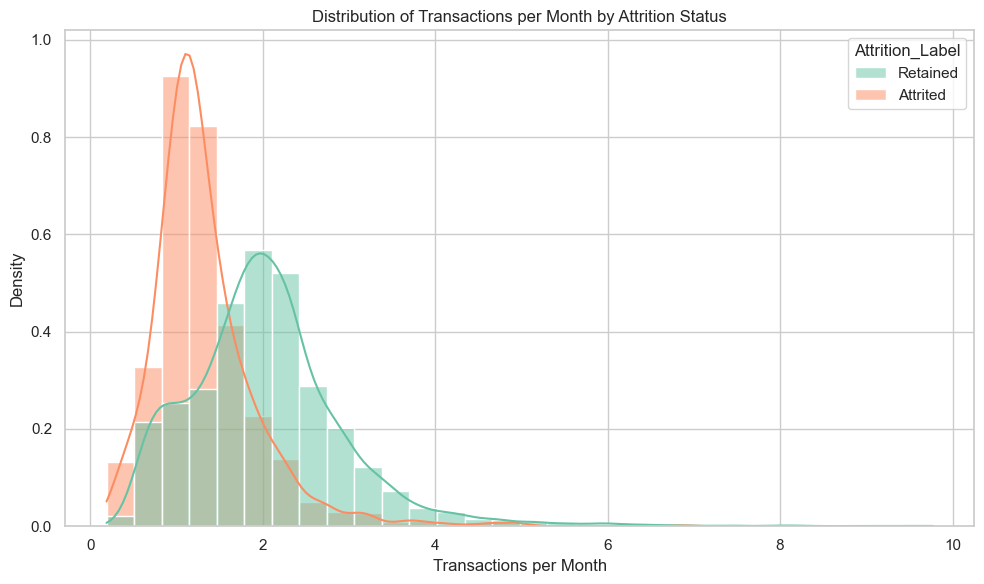

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Trans_per_Month",
    hue="Attrition_Label",
    kde=True,
    bins=30,
    palette="Set2",
    stat="density",
    common_norm=False,
    alpha=0.5
)

plt.title("Distribution of Transactions per Month by Attrition Status")
plt.xlabel("Transactions per Month")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

**Distribution of Transactions per Month by Attrition Status:**

The KDE plot reveals a clear behavioral difference: customers who churn tend to make fewer than 2 transactions per month, while retained customers are more active and spread out across higher frequencies. This supports the conclusion that monthly engagement is a strong differentiator of churn.

---

## Average Transaction Amount

**Null hypothesis:** Average transaction amount and attrition rate are not statistically related. Any relationship between them is merely random.

In [41]:
# Mann-Whitney U Test for Average Transaction Amount
ATA_attrited = df[df["mod_Attrition_Flag"] == 1]["Avg_Trans_Amt"].dropna()
ATA_retained = df[df["mod_Attrition_Flag"] == 0]["Avg_Trans_Amt"].dropna()

pg.mwu(x=ATA_attrited, y=ATA_retained)

,U-val,alternative,p-val,RBC,CLES
MWU,6842451.0,two-sided,0.503369,-0.010456,0.494772


Average transaction amount does not show a meaningful relationship with churn. Both churned and retained customers have very similar average transaction amounts, and the mwu test confirms this with a p-value of 0.50.

---

# Save transformed DataFrame to CSV

In [45]:
df.to_csv("../data/bank_churners_transformed_v2.csv", index=False)

---

# Conclusion

1. Created the following **new features:** Transactions per Month, Average Transaction Amount, and Utilization Ratio.

2. **Lower transaction frequency indicates higher churn risk**  
   Customers who make fewer transactions per month (especially <2) show significantly higher attrition rates. This highlights engagement frequency as a powerful early warning signal for churn.

3. **Credit limit and utilization matter**  
   Attrited customers consistently have lower credit limits and lower utilization ratios. These financial indicators suggest that low product value perception or credit access may drive disengagement.

4. **Demographics show weak predictive power**  
   While differences exist in income, education, and marital status between attrited and retained customers, their statistical significance is limited. Behavior-based features (e.g., transaction patterns) are far more predictive.

5. Behavioral indicators — particularly **spending levels**, **transaction frequency**, **utilization ratio**, and **credit limit** — are stronger predictors of churn than demographics like income, education, or marital status.
Intervening early with customers who show low credit usage, reduced spending, or limited credit limits can help prevent attrition. Targeted engagement strategies (e.g., usage incentives, credit upgrades, and value-added services) should be prioritized over demographic targeting.

Below is an overview of the hypotheses and the results.

| Hypothesis                                                                 | Supported? | Test                    | p-value     |
|----------------------------------------------------------------------------|------------|-------------------------|-------------|
| Attrited customers have significantly lower total transaction amounts.     | Yes        | MWU on Total_Trans_Amt  | < 1e-100    |
| Attrition is higher among clients with lower credit limits.               | Yes  | MWU on Credit_Limit     | < 0.001     |
| Attrition rates vary by marital status, with single customers churning more. | Weak     | MWU on Marital_Status   | ~ 0.08      |
| Customers with lower education levels tend to churn more.                 | No         | MWU on Education Level  | ~ 0.09      |
| Customers with fewer transactions per month are more likely to churn.     | Yes        | MWU on Trans_per_Month  | < 1e-200    |
| Average transaction amount differs between churned and retained customers. | No         | MWU on Avg_Trans_Amt    | ~ 0.50      |
| Does income impact attrition rates? | No | MWU on Income_Categories | ~ 0.1 |.
